In [ ]:
import GEOparse
gse = GEOparse.get_GEO("GSE197406", destdir= "../GEO")
gpl = GEOparse.get_GEO("GSE197406", destdir= "../GEO")

In [10]:
len(gse.gsms)
list(gse.gsms.keys())[ :3]

['GSM5916425', 'GSM5916426', 'GSM5916427']

In [16]:
gsm_keys = list(gse.gsms.keys())
example = gse.gsms[gsm_keys[0]]
print(example.table.head())

        ID_REF     VALUE
0    217771_at   6.37042
1    206606_at  11.61950
2  215712_s_at   9.16470
3   1559573_at  10.70350
4  209978_s_at  14.51450


In [17]:
expr_matrix = gse.pivot_samples("VALUE")
expr_matrix.head(3)

name,GSM5916425,GSM5916426,GSM5916427,GSM5916428,GSM5916429,GSM5916430,GSM5916431,GSM5916432,GSM5916433,GSM5916434,GSM5916435,GSM5916436,GSM5916437,GSM5916438,GSM5916439
ID_REF,,,,,,,,,,,,,,,
1007_s_at,8.25153,7.76315,8.40313,7.98926,8.05217,8.44563,7.58667,8.02614,9.79436,9.66555,9.49759,9.89471,8.45370,8.85845,8.84316
1053_at,6.74268,6.75010,6.50660,6.88312,6.97066,6.76910,6.89180,6.67075,6.93478,6.90036,6.62057,6.62056,6.52978,6.72519,6.55780
117_at,6.74961,6.53426,6.72746,6.90891,6.80198,6.80546,6.76402,6.76341,6.74732,6.86814,6.90635,6.84800,6.63013,6.73454,6.55409


In [23]:
pheno = gse.phenotype_data
pheno.columns

Index(['title', 'geo_accession', 'status', 'submission_date',
       'last_update_date', 'type', 'channel_count', 'source_name_ch1',
       'organism_ch1', 'taxid_ch1', 'characteristics_ch1.0.disease state',
       'characteristics_ch1.1.tissue', 'characteristics_ch1.2.genotype',
       'characteristics_ch1.3.age', 'treatment_protocol_ch1',
       'growth_protocol_ch1', 'molecule_ch1', 'extract_protocol_ch1',
       'label_ch1', 'label_protocol_ch1', 'hyb_protocol', 'scan_protocol',
       'description', 'data_processing', 'platform_id', 'contact_name',
       'contact_laboratory', 'contact_department', 'contact_institute',
       'contact_address', 'contact_city', 'contact_state',
       'contact_zip/postal_code', 'contact_country', 'supplementary_file',
       'series_id', 'data_row_count'],
      dtype='object')

In [31]:
# Create folder path if not already existing
import os
os.makedirs("../data/GSE", exist_ok=True)
expr_matrix.to_csv("../data/GSE/GSE197406_expression_matrix.csv")
pheno.to_csv("../data/GSE/GSE197406_pheno_data.csv")

In [43]:
import GEOparse

# Load the platform used by GSE197406
gpl = GEOparse.get_GEO("GPL570", destdir="../GEO")

print("✅ Platform loaded:", gpl.metadata["title"][0])
print("Number of probe annotations:", len(gpl.table))


09-Oct-2025 01:54:49 DEBUG utils - Directory ../GEO already exists. Skipping.
09-Oct-2025 01:54:49 INFO GEOparse - Downloading http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=self&acc=GPL570&form=text&view=full to ../GEO/GPL570.txt
09-Oct-2025 01:54:52 DEBUG downloader - Total size: 0
09-Oct-2025 01:54:52 DEBUG downloader - md5: None
81.6MB [00:02, 29.4MB/s]
09-Oct-2025 01:54:55 DEBUG downloader - Moving /var/folders/1c/4pxks9s17nnfr2djltgq72mr0000gn/T/tmp16s43tga to /Volumes/NGS/Myytcode/codeforytv/GEO/GPL570.txt
09-Oct-2025 01:54:55 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=self&acc=GPL570&form=text&view=full
09-Oct-2025 01:54:55 INFO GEOparse - Parsing ../GEO/GPL570.txt: 
09-Oct-2025 01:54:55 DEBUG GEOparse - PLATFORM: GPL570


✅ Platform loaded: [HG-U133_Plus_2] Affymetrix Human Genome U133 Plus 2.0 Array
Number of probe annotations: 54675


/Volumes/NGS/conda/miniconda3/envs/myytcode/lib/python3.12/site-packages/GEOparse/GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")


In [45]:
# Extract relevant columns
gpl_annot = gpl.table[["ID", "Gene Symbol", "Gene Title"]]
gpl_annot.head()


,ID,Gene Symbol,Gene Title
0,1007_s_at,DDR1 /// MIR4640,discoidin domain receptor tyrosine kinase 1 //...
1,1053_at,RFC2,"replication factor C (activator 1) 2, 40kDa"
2,117_at,HSPA6,heat shock 70kDa protein 6 (HSP70B')
3,121_at,PAX8,paired box 8
4,1255_g_at,GUCA1A,guanylate cyclase activator 1A (retina)


In [52]:
# Make sure expr index matches probe IDs
expr_matrix.index.name = "ID"

# Merge probe annotation with expression data
expr_annot = gpl_annot.merge(expr_matrix, on="ID", how="inner")

print("✅ Annotated expression matrix shape:", expr_annot.shape)
expr_annot.head(2)


✅ Annotated expression matrix shape: (54675, 18)


,ID,Gene Symbol,Gene Title,GSM5916425,GSM5916426,GSM5916427,GSM5916428,GSM5916429,GSM5916430,GSM5916431,GSM5916432,GSM5916433,GSM5916434,GSM5916435,GSM5916436,GSM5916437,GSM5916438,GSM5916439
0,1007_s_at,DDR1 /// MIR4640,discoidin domain receptor tyrosine kinase 1 //...,8.25153,7.76315,8.40313,7.98926,8.05217,8.44563,7.58667,8.02614,9.79436,9.66555,9.49759,9.89471,8.45370,8.85845,8.84316
1,1053_at,RFC2,"replication factor C (activator 1) 2, 40kDa",6.74268,6.75010,6.50660,6.88312,6.97066,6.76910,6.89180,6.67075,6.93478,6.90036,6.62057,6.62056,6.52978,6.72519,6.55780


In [61]:
## drop probe id without  ##


expr_annot[expr_annot["Gene Symbol"].notnull()& (expr_annot["Gene Symbol"] != "")]

## average gene expression ##
expr_gene = expr_annot.groupby("Gene Symbol").mean(numeric_only= True)

print("collapsed to genelevel:", expr_gene.shape)
expr_gene.head(5)

collapsed to genelevel: (23520, 15)


,GSM5916425,GSM5916426,GSM5916427,GSM5916428,GSM5916429,GSM5916430,GSM5916431,GSM5916432,GSM5916433,GSM5916434,GSM5916435,GSM5916436,GSM5916437,GSM5916438,GSM5916439
Gene Symbol,,,,,,,,,,,,,,,
A1BG,13.36290,13.591000,12.27380,13.664100,13.43870,13.28000,13.460400,13.642200,10.886900,10.38160,10.621100,10.311600,9.459760,11.687300,9.41212
A1BG-AS1,7.49387,7.189490,7.37301,7.830680,7.22424,7.41163,7.681040,8.323270,7.363000,7.44656,7.454340,7.331110,7.186310,7.585580,7.26326
A1CF,12.56925,12.496750,12.66575,12.039650,12.45315,12.38950,11.897200,12.716950,10.386200,10.63970,10.836250,11.396750,11.416300,11.895000,11.14225
A2M,10.34091,10.350795,9.90035,10.223595,10.22547,9.32729,9.997065,10.336435,9.779225,9.94644,10.350585,9.911495,10.077495,10.375885,10.16527
A2M-AS1,6.82393,6.921940,7.20040,6.498240,6.65766,6.52950,7.157360,8.217780,6.376880,6.70249,6.651350,6.597460,7.582040,6.799730,7.67728


In [62]:
expr_gene.to_csv("../data/GSE/GSE197406_gene_expression_mean.csv")

##### now we do the DEGs analysis using python ##

In [67]:
import numpy as np
pheno["condition"] = np.where(
    pheno["source_name_ch1"].str.contains("no liver abnormality",
                                          case=False,
                                          na=False),
                                          "control","treated"
)

In [72]:
pheno[["geo_accession","source_name_ch1","condition"]]
pheno["condition"].value_counts()

condition
control    8
treated    7
Name: count, dtype: int64

In [74]:
expr_gene = expr_gene[pheno["geo_accession"]]

##### Perform DEG analysis using the statmodels

In [79]:
import pandas as pd
import statsmodels.api as sm
from tqdm import tqdm
import numpy as np
from statsmodels.stats.multitest import multipletests

# 1️⃣ Create numeric design matrix
pheno["condition_num"] = (pheno["condition"] == "treated").astype(int)

# Check mapping
print(pheno[["geo_accession", "condition", "condition_num"]].head())

# 2️⃣ Prepare design matrix
X = sm.add_constant(pheno["condition_num"].values)  # adds intercept
results = []

# 3️⃣ Loop through genes
for gene in tqdm(expr_gene.index):
    y = expr_gene.loc[gene].values.astype(float)
    model = sm.OLS(y, X).fit()
    coef = model.params[1]
    pval = model.pvalues[1]
    results.append((gene, coef, pval))

# 4️⃣ Build DEG results DataFrame
deg_results = pd.DataFrame(results, columns=["Gene", "logFC", "pvalue"])

# 5️⃣ Adjust p-values (Benjamini-Hochberg FDR)
deg_results["adj.P.Val"] = multipletests(deg_results["pvalue"], method="fdr_bh")[1]

# 6️⃣ Filter significant DEGs
deg_sig = deg_results[(deg_results["adj.P.Val"] < 0.05) & (abs(deg_results["logFC"]) > 0.6)]

print("✅ Significant DEGs found:", len(deg_sig))
deg_sig.head()


# Add a column for DEG classification
deg_results["Regulation"] = "NotSig"
deg_results.loc[(deg_results["adj.P.Val"] < 0.05) & (deg_results["logFC"] > 0.6), "Regulation"] = "Up"
deg_results.loc[(deg_results["adj.P.Val"] < 0.05) & (deg_results["logFC"] < -0.6), "Regulation"] = "Down"

# Quick check of counts
print(deg_results["Regulation"].value_counts())





           geo_accession condition  condition_num
GSM5916425    GSM5916425   control              0
GSM5916426    GSM5916426   control              0
GSM5916427    GSM5916427   control              0
GSM5916428    GSM5916428   control              0
GSM5916429    GSM5916429   control              0


100%|██████████| 23520/23520 [00:13<00:00, 1714.00it/s]

✅ Significant DEGs found: 1298
Regulation
NotSig    22222
Down        745
Up          553
Name: count, dtype: int64


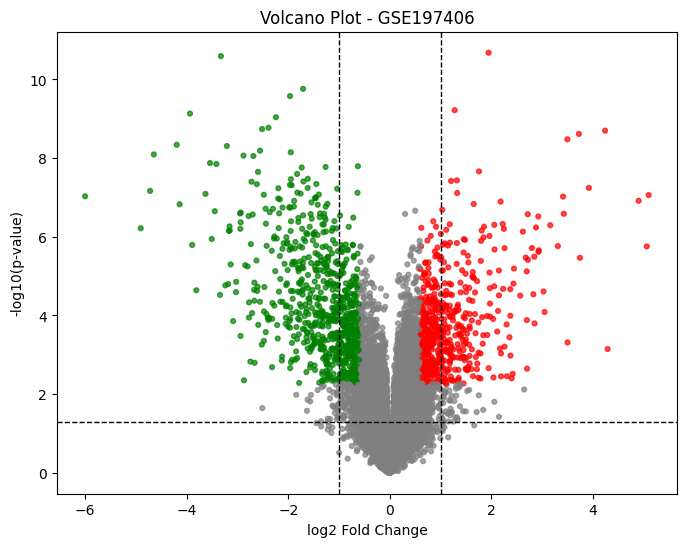

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Define color map
colors = {"Up": "red", "Down": "green", "NotSig": "grey"}

plt.figure(figsize=(8,6))
plt.scatter(
    deg_results["logFC"], 
    -np.log10(deg_results["pvalue"]),
    c=deg_results["Regulation"].map(colors),
    alpha=0.7,
    s=12
)

# Add reference lines
plt.axvline(x=1, color="black", linestyle="--", lw=1)
plt.axvline(x=-1, color="black", linestyle="--", lw=1)
plt.axhline(y=-np.log10(0.05), color="black", linestyle="--", lw=1)

plt.xlabel("log2 Fold Change")
plt.ylabel("-log10(p-value)")
plt.title("Volcano Plot - GSE197406")

plt.show()

